In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import psycopg2
import json
import seaborn as sns
plt.rcParams['figure.figsize'] = 12, 8 

In [3]:
dbconf = None
with open('/Users/atfienberg/g-2/sipmometer/config/dbconnection.json', 'r') as f:
    dbconf = json.load(f)

In [4]:
cnx = psycopg2.connect(user=dbconf['user'], password=dbconf['password'],
                                  host=dbconf['host'],
                                  database=dbconf['dbname'], port=dbconf['port'])
cursor=cnx.cursor()
cursor.execute("select value, time from g2sc_values where channel='calo13temps'")
sipmnames = ['SiPM{}'.format(i) for i in range(54)] 
temps, times = zip(*cursor)

cursor.close()
cnx.close()

# build pandas dataframe
tempframe = pd.DataFrame(np.array(temps), columns=sipmnames, index=np.array(times))
# mask out failed reads
tempframe = tempframe[(tempframe > 20) & (tempframe < 50)]
tempframe.head()

,SiPM0,SiPM1,SiPM2,SiPM3,SiPM4,SiPM5,SiPM6,SiPM7,SiPM8,SiPM9,...,SiPM44,SiPM45,SiPM46,SiPM47,SiPM48,SiPM49,SiPM50,SiPM51,SiPM52,SiPM53
2017-03-06 12:34:05.756824,NaN,31.5,31.0,30.9375,31.5,32.2500,33.6875,34.7500,34.0625,NaN,...,35.0625,NaN,30.1875,31.5625,31.7500,33.0000,34.2500,34.0625,NaN,NaN
2017-03-06 12:34:20.822937,NaN,31.5,31.0,31.0000,31.5,32.2500,33.6875,34.7500,34.0625,NaN,...,35.0625,NaN,30.1875,31.5625,31.7500,32.9375,34.2500,34.0625,NaN,NaN
2017-03-06 12:34:35.836103,NaN,31.5,31.0,31.0000,31.5,32.2500,33.6875,34.8125,34.1250,NaN,...,35.0625,NaN,30.2500,31.5625,31.7500,33.0000,34.2500,34.0000,NaN,NaN
2017-03-06 12:34:50.878768,NaN,31.5,31.0,31.0000,31.5,32.1875,33.6875,34.8125,34.0625,NaN,...,35.0625,NaN,30.1875,31.5625,31.6875,33.0000,34.2500,34.0625,NaN,NaN
2017-03-06 12:35:05.843598,NaN,31.5,31.0,31.0000,31.5,32.2500,33.7500,34.7500,34.0625,NaN,...,35.0625,NaN,30.2500,31.6250,31.7500,32.9375,34.3125,34.0625,NaN,NaN


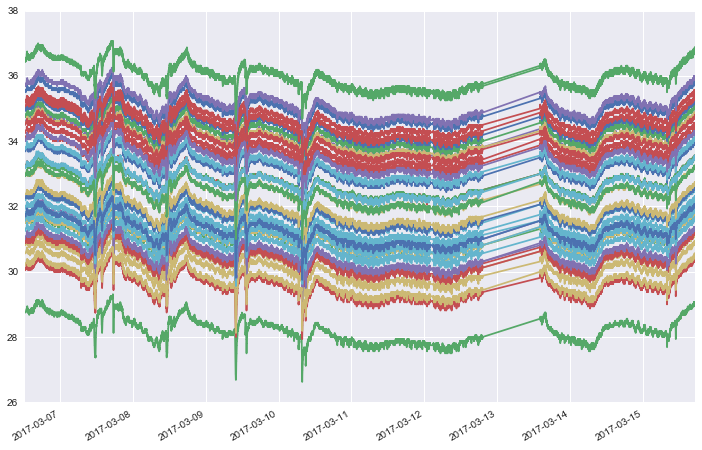

In [5]:
tempframe.plot(legend=False)
lims=plt.ylim(26,38)

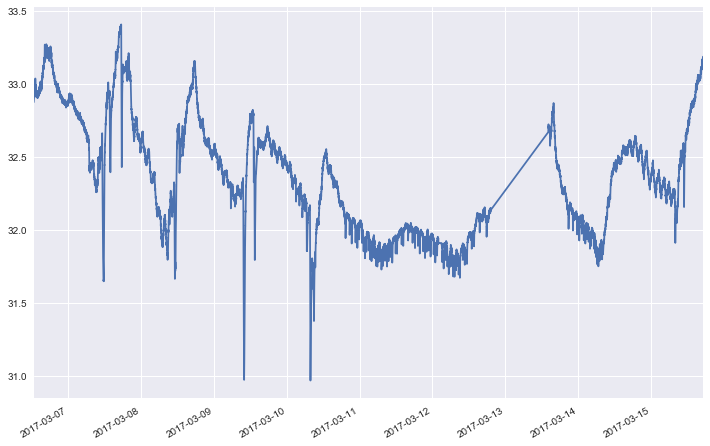

In [6]:
mean = tempframe.mean(1).plot()

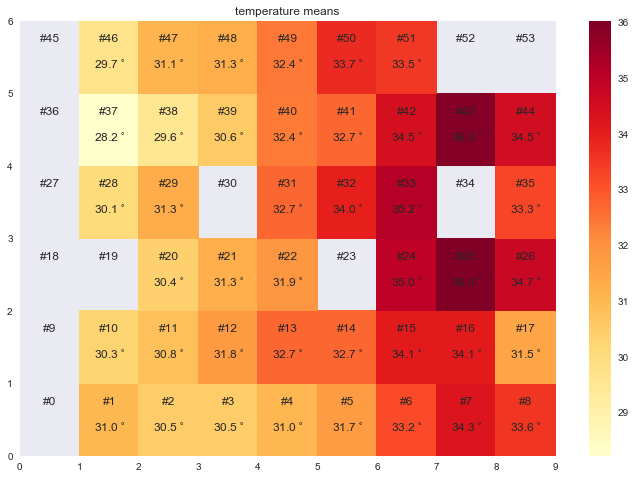

In [7]:
griddata = np.reshape(tempframe.mean().as_matrix(), (6,9))
griddata = np.ma.masked_invalid(griddata)
heatmap = plt.pcolor(griddata, cmap='YlOrRd')
plt.colorbar(heatmap)
for y in range(griddata.shape[0]):
    for x in range(griddata.shape[1]):
        val = griddata[y,x]          
        plt.text(x+0.5, y+0.75, '#{}'.format(y*9+x), horizontalalignment='center', verticalalignment='center')
        if val > 0.1:
            plt.text(x+0.5, y+0.4, '{:.1f}$^\circ$'.format(val), horizontalalignment='center', verticalalignment='center')
title=plt.title('temperature means')

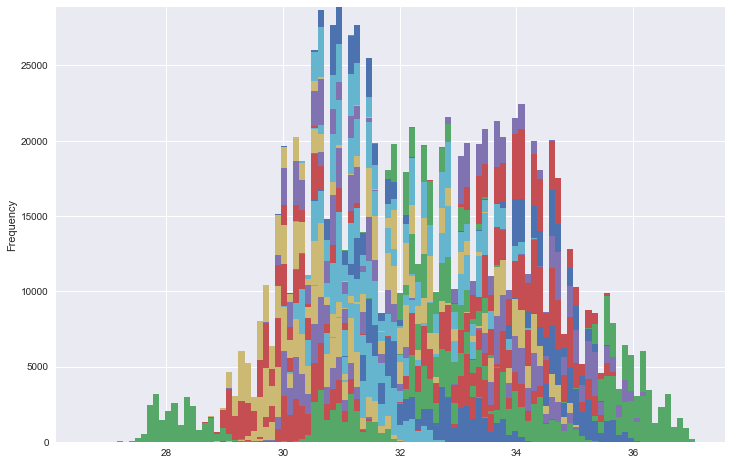

In [8]:
hists = tempframe.plot.hist(stacked=True, legend=False, bins=100)

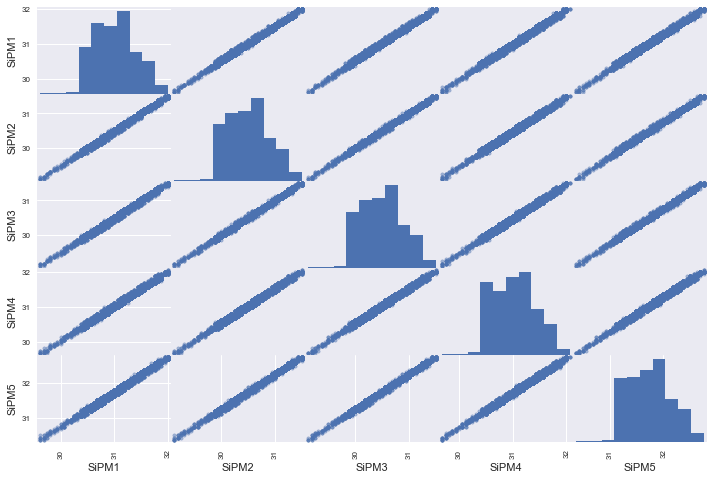

In [9]:
from pandas.tools.plotting import scatter_matrix
scatter_plots = scatter_matrix(tempframe.iloc[:,1:6])

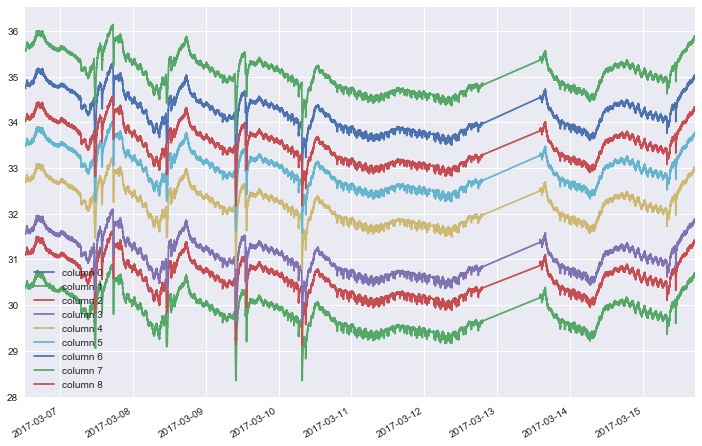

In [10]:
for i in range(9):
    tempframe['column {}'.format(i)] = tempframe.iloc[:,i::9].mean(1)
tempframe.loc[:,'column 0':'column 8'].plot()
plt.legend(loc='best')

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,row 0,row 1,row 2,row 3,row 4,row 5
2017-03-06 12:34:05.756824,NaN,30.3625,31.093750,31.5500,32.708333,33.4875,34.750000,35.562500,34.0250,32.460938,32.734375,33.708333,33.260417,32.812500,32.468750
2017-03-06 12:34:20.822937,NaN,30.3625,31.104167,31.5625,32.687500,33.5000,34.750000,35.578125,34.0125,32.468750,32.734375,33.718750,33.250000,32.820312,32.458333
2017-03-06 12:34:35.836103,NaN,30.3750,31.104167,31.5625,32.697917,33.4875,34.739583,35.609375,34.0125,32.484375,32.726562,33.708333,33.250000,32.828125,32.468750


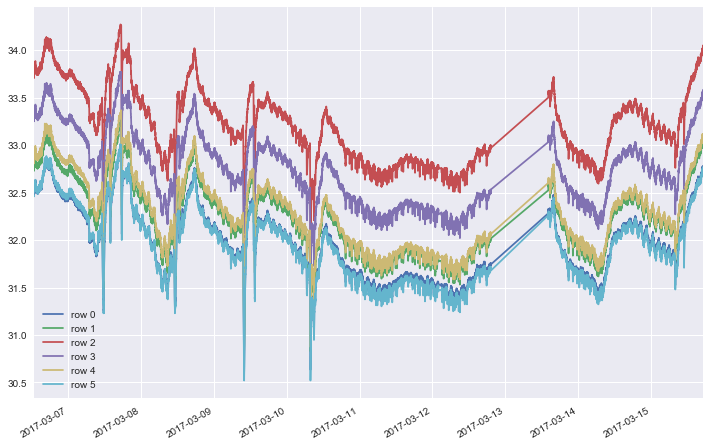

In [11]:
for i in range(6):
    tempframe['row {}'.format(i)] = tempframe.iloc[:,9*i:9*(i+1)].mean(1)
tempframe.loc[:,'row 0':'row 5'].plot()
tempframe.iloc[:3,54:]

In [12]:
rebinned = tempframe.groupby([i//10 for i, val in enumerate(tempframe.index)]).mean()

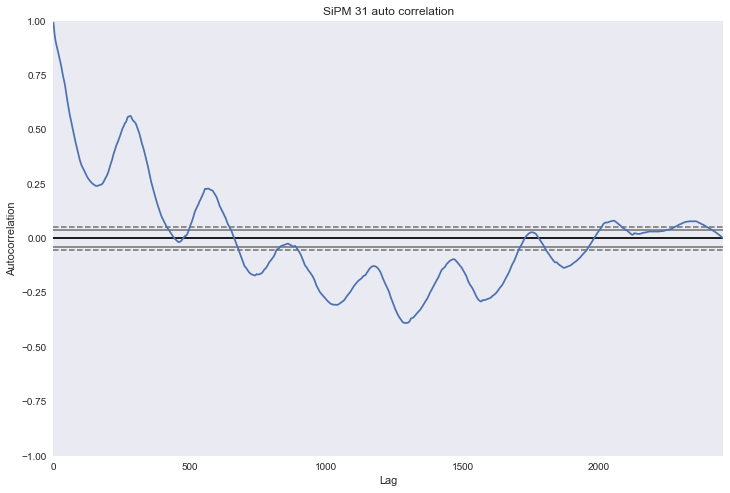

In [13]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(rebinned['SiPM31'])
plt.title('SiPM 31 auto correlation')

In [14]:
for name in tempframe.columns[pd.isnull(tempframe.sum())]:
    print('{} is all NaNs'.format(name))

SiPM0 is all NaNs
SiPM9 is all NaNs
SiPM18 is all NaNs
SiPM19 is all NaNs
SiPM23 is all NaNs
SiPM27 is all NaNs
SiPM30 is all NaNs
SiPM34 is all NaNs
SiPM36 is all NaNs
SiPM45 is all NaNs
SiPM52 is all NaNs
SiPM53 is all NaNs
column 0 is all NaNs


In [15]:
resampled = tempframe.resample('5T').mean()
resampled[:3]

,SiPM0,SiPM1,SiPM2,SiPM3,SiPM4,SiPM5,SiPM6,SiPM7,SiPM8,SiPM9,...,column 5,column 6,column 7,column 8,row 0,row 1,row 2,row 3,row 4,row 5
2017-03-06 12:30:00,NaN,31.5,31.0,30.984375,31.5,32.234375,33.6875,34.78125,34.078125,NaN,...,33.4875,34.752604,35.582031,34.015625,32.470703,32.736328,33.716146,33.255208,32.816406,32.463542
2017-03-06 12:35:00,NaN,31.5,31.0,31.000000,31.5,32.250000,33.7500,34.75000,34.062500,NaN,...,33.5000,34.770833,35.562500,34.025000,32.476562,32.734375,33.708333,33.250000,32.820312,32.489583
2017-03-06 12:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


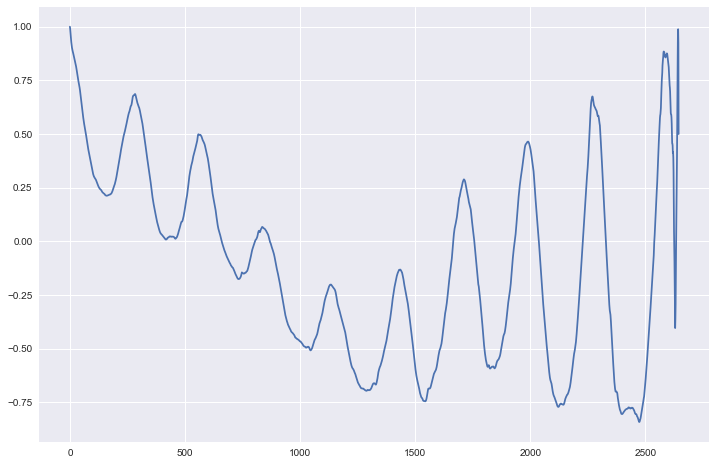

In [16]:
plt.plot([resampled['SiPM1'].autocorr(i) for i, t in enumerate(resampled.index[1:])])

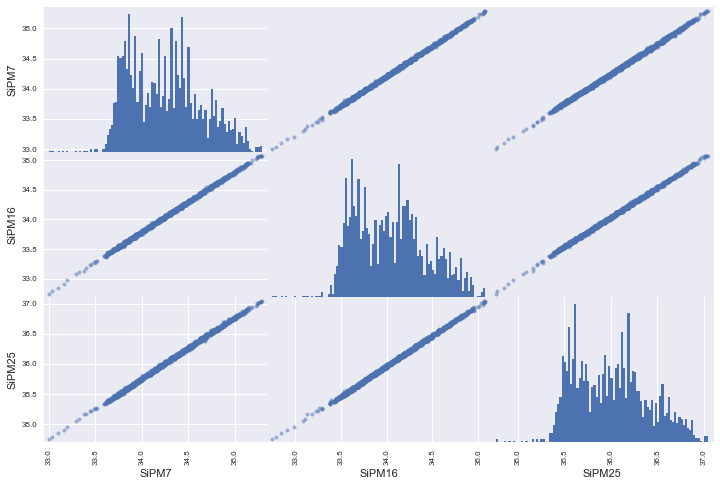

In [17]:
from pandas.tools.plotting import scatter_matrix
sm = scatter_matrix(resampled.iloc[:,7:26:9], diagonal='hist', hist_kwds={'bins':100})

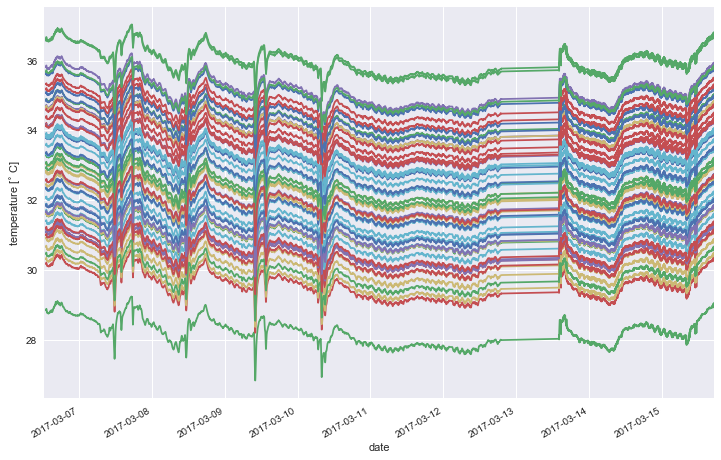

In [18]:
tempframe.rolling(30).mean().plot(legend=False)
plt.xlabel('date')
plt.ylabel('temperature [$^{\circ}$ C]')

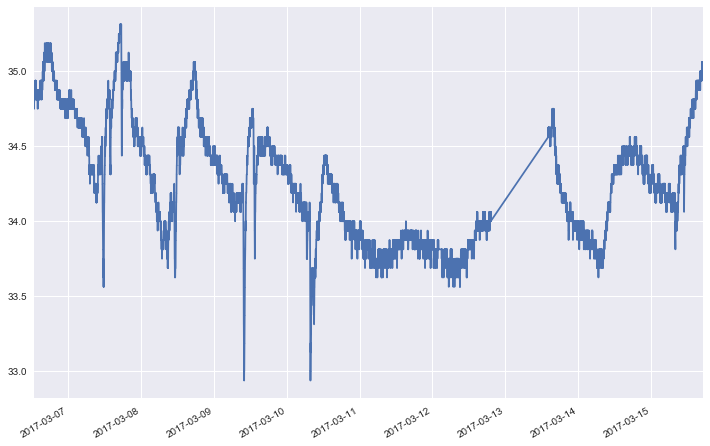

In [19]:
tempframe['SiPM7'].plot(legend=False)